In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [15]:
# Loading the Customer Demographics Data from the excel file

cust_demo = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerDemographic')

In [16]:
# Checking first 5 records from Customer Demographics Data

cust_demo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [17]:
# Information of columns and data-types of Customer Demographics Data.

cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


The data-type of columns looks fine. However here <b>default</b> is an irrelevent column which should be dropped / deleted from the dataset. Let's check for the data quality and apply data cleaning process where ever applicable to clean our dataset before performing any analysis.

## Total Records

In [18]:
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


## Numeric Columns and Non-Numeric Columns

In [19]:
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


## 1. Dropping Irrelevent Columns

<b>default is an irrelevent column. Hence it should be dropped.</b>

In [20]:
# Dropping the default column

cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

## 2. Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [21]:
# Total number of missing values

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [22]:
# Percentage of missing values

cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Here it is observed that columns like gender, DOB, job_title, job_industry_category and tenure have missing values.

### 2.1 Last Name

In [23]:
# Checking for the presence of first name and customer id in records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. <b>Hence it is okay for to not have a last name. Filling null last names with "None"</b>.

In [24]:
# Fetching records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,No,5.0
210,211,Beitris,NaN,Female,6,1974-03-04,VP Marketing,Manufacturing,Mass Customer,N,Yes,5.0
249,250,Kristofer,NaN,Male,53,1988-04-15,Legal Assistant,Health,Mass Customer,N,Yes,13.0
250,251,Mala,NaN,Female,88,1977-12-24,VP Sales,Financial Services,Affluent Customer,N,Yes,10.0
256,257,Marissa,NaN,Female,70,1966-02-08,Sales Associate,Manufacturing,Affluent Customer,N,Yes,19.0
274,275,Dud,NaN,Male,7,1955-07-27,VP Sales,Health,High Net Worth,N,No,13.0


In [25]:
cust_demo['last_name'].fillna('None',axis=0, inplace=True)

In [26]:
cust_demo['last_name'].isnull().sum()

0

Currently there are no missing values for last name column.

### 2.2 Date of Birth

In [27]:
cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
452,453,Cornelius,Yarmouth,U,81,NaT,Assistant Professor,IT,High Net Worth,N,No,NaN
453,454,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,Yes,NaN
479,480,Darelle,Ive,U,67,NaT,Registered Nurse,Health,Mass Customer,N,Yes,NaN
512,513,Kienan,Soar,U,30,NaT,Tax Accountant,IT,Mass Customer,N,No,NaN
525,526,Ardelle,None,U,9,NaT,Social Worker,Health,Mass Customer,N,Yes,NaN


In [28]:
round(cust_demo['DOB'].isnull().mean()*100)

2.0

<b>Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.</b>

In [29]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Int64Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,
             581,  598,  679,  684,  798,  838,  882,  891,  949,  974,  982,
             995, 1037, 1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582,
            1627, 1682, 1739, 1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020,
            2068, 2164, 2204, 2251, 2294, 2334, 2340, 2413, 2425, 2468, 2539,
            2641, 2646, 2695, 2696, 2853, 2919, 2962, 2998, 3011, 3085, 3150,
            3221, 3222, 3254, 3287, 3297, 3311, 3321, 3342, 3364, 3472, 3509,
            3512, 3564, 3653, 3717, 3726, 3778, 3882, 3930, 3934, 3997],
           dtype='int64')

In [30]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [31]:
cust_demo['DOB'].isnull().sum()

0

Currently there are no missing values for DOB column.

### Creating Age Column for checking further descripency in data

In [32]:
# Function to calculate the age as of today based on the DOB of the customer.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['Age'] = cust_demo['DOB'].apply(age)

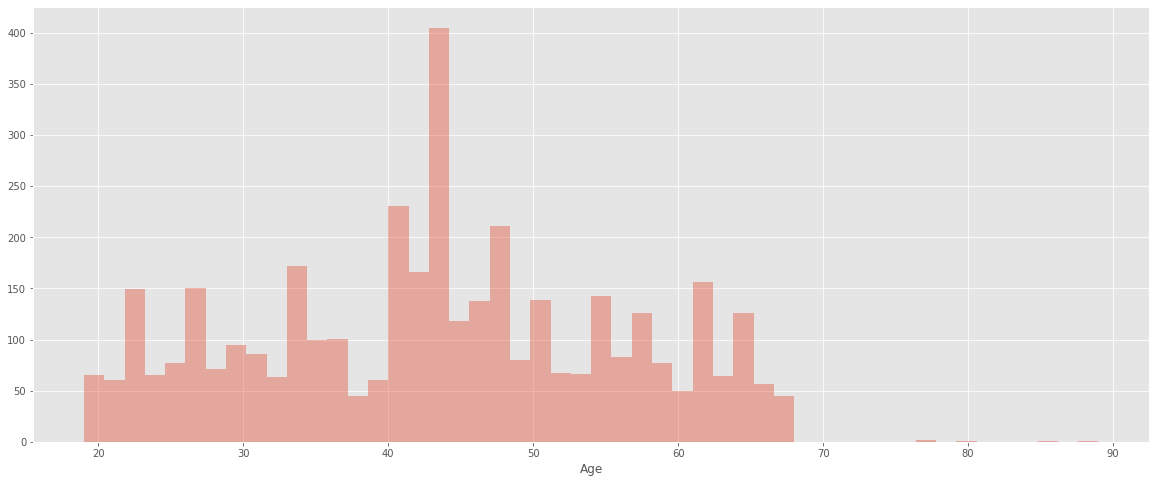

In [58]:
# Viz to find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)

<b>Statistics of the Age column</b>

In [34]:
cust_demo['Age'].describe()

count    3913.000000
mean       43.346026
std        12.803129
min        19.000000
25%        34.000000
50%        43.000000
75%        53.000000
max       177.000000
Name: Age, dtype: float64

Here we find there is only 1 customer with an age of 177. Clearly this is an outlier since the 75th percentile of Age is 53.

In [35]:
cust_demo[cust_demo['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,177


<b>Here we see a customer with age 177 which is an outlier. hence we need to remove this record.</b>

In [36]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

### 2.3 Tenure

<b>When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.</b>

In [37]:
cust_demo['tenure'].isnull().sum()

0

There are no missing values for Tenure column.

### 2.4 Job Title

In [38]:
# Fetching records where Job Title is missing.

cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,54
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,45
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,67
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,58
22,23,Olav,Polak,Male,43,1995-02-10,NaN,NaN,High Net Worth,N,Yes,1.0,26
29,30,Darrick,Helleckas,Male,18,1961-10-18,NaN,IT,Affluent Customer,N,Yes,6.0,59
45,46,Kaila,Allin,Female,98,1972-02-26,NaN,NaN,Affluent Customer,N,Yes,15.0,49
51,52,Curran,Bentson,Male,57,1988-06-22,NaN,Financial Services,Mass Customer,N,Yes,13.0,32
59,60,Nadiya,Champerlen,Female,18,1970-02-04,NaN,Manufacturing,Mass Customer,N,No,10.0,51


<b>Since Percentage of missing Job is 13. We will replace null values with Missing.</b>

In [39]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

In [40]:
cust_demo['job_title'].isnull().sum()

0

Currently there are no mssing values for job_title column.

## 2.5 Job Industry Category

In [41]:
cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,44
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,59
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,44
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,59
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,53
22,23,Olav,Polak,Male,43,1995-02-10,Missing,NaN,High Net Worth,N,Yes,1.0,26
32,33,Ernst,Hacon,Male,44,1957-06-25,Product Engineer,NaN,Affluent Customer,N,Yes,11.0,63
35,36,Lurette,Stonnell,Female,33,1977-11-09,VP Quality Control,NaN,Affluent Customer,N,No,22.0,43
45,46,Kaila,Allin,Female,98,1972-02-26,Missing,NaN,Affluent Customer,N,Yes,15.0,49
47,48,Rebbecca,Casone,Female,46,1975-08-15,Biostatistician II,NaN,Mass Customer,N,Yes,8.0,45


<b>Since Percentage of missing Job Industry Category is 16. We will replace null values with Missing</b>

In [42]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [43]:
cust_demo['job_industry_category'].isnull().sum()

0

<b>Finally there are no Missing Values in the dataset.</b>

In [44]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [45]:
print("Total records after removing Missing Values: {}".format(cust_demo.shape[0]))

Total records after removing Missing Values: 3912


## 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.<br>
The columns to be checked are <b>'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'</b>

### 3.1 Gender

In [46]:
cust_demo['gender'].value_counts()

Female    2037
Male      1872
F            1
M            1
Femal        1
Name: gender, dtype: int64

Here there are inconsistent data in gender column.There are spelling mistakes and typos. For gender with value <b>M will be replaced with Male</b>, <b>F will be replaced by Female</b> and <b>Femal will be replaced by Female</b>

In [47]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [48]:
cust_demo['gender'].value_counts()

Female    2039
Male      1873
Name: gender, dtype: int64

The inconsistent data ,spelling mistakes and typos in gender column are removed. 

### 3.2 Wealth Segment

There is <b>no inconsistent data</b> in <b>wealth_segment</b> column.

In [49]:
cust_demo['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

### 3.3 Deceased Indicator

There is <b>no inconsistent data</b> in <b>deceased_indicator</b> column.

In [50]:
cust_demo['deceased_indicator'].value_counts()

N    3910
Y       2
Name: deceased_indicator, dtype: int64

### 3.4 Owns a Car

There is <b>no inconsistent data</b> in <b>owns_car</b> column.

In [51]:
cust_demo['owns_car'].value_counts()

Yes    1974
No     1938
Name: owns_car, dtype: int64

## 4. Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.<br>For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [52]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


<b>Since both the numbers are same. There are no duplicate records in the dataset.</b>

## 5. Exporting the Cleaned Customer Demographic Data Set to csv

Currently the Customer Demographics dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.

In [53]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)